In [21]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [6]:
polygons_gdf = gpd.read_file('../assets/Council_Districts/Council_Districts.shp', encoding='utf8')

In [7]:
polygons_gdf

,OBJECTID,NAME,District,Dist_Name,geometry
0,1,Eunisses Hernandez,1,1 - Eunisses Hernandez,"POLYGON ((6480273.222 1839488.399, 6480211.864..."
1,2,Paul Krekorian,2,2 - Paul Krekorian,"POLYGON ((6459694.887 1902991.456, 6460526.739..."
2,3,Bob Blumenfield,3,3 - Bob Blumenfield,"POLYGON ((6395647.002 1903090.407, 6395646.918..."
3,4,Nithya Raman,4,4 - Nithya Raman,"POLYGON ((6404871.571 1898627.766, 6404866.237..."
4,5,Katy Yaroslavsky,5,5 - Katy Yaroslavsky,"POLYGON ((6443136.993 1863527.133, 6442919.776..."
5,6,Imelda Padilla,6,6 - Imelda Padilla,"POLYGON ((6451238.597 1905812.106, 6452300.399..."
6,7,Monica Rodriguez,7,7 - Monica Rodriguez,"POLYGON ((6459694.887 1902991.456, 6459010.580..."
7,8,Marqueece Harris-Dawson,8,8 - Marqueece Harris-Dawson,"POLYGON ((6470694.238 1836040.563, 6471134.523..."
8,9,Curren D. Price Jr.,9,9 - Curren D. Price Jr.,"POLYGON ((6489023.277 1827853.077, 6489008.234..."
9,10,Heather Hutt,10,10 - Heather Hutt,"POLYGON ((6474480.262 1847607.973, 6474481.580..."


In [9]:
crimes_df = pd.read_csv('../data/cleaned_data-crime.csv')
crimes_gdf = gpd.GeoDataFrame(
    crimes_df,
    geometry=gpd.points_from_xy(crimes_df.LON, crimes_df.LAT)
)

In [11]:
crimes_gdf.set_crs(polygons_gdf.crs, inplace=True)

,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status Desc,LOCATION,LAT,LON,geometry
0,2020-03-01,21:30:00,Wilshire,VEHICLE - STOLEN,0,Male,Other,STREET,NaN,Adult Arrest,1900 S LONGWOOD AV,34.0375,-118.3506,POINT (-118.351 34.038)
1,2020-02-08,18:00:00,Central,BURGLARY FROM VEHICLE,47,Male,Other,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,Investigation Continuous,1000 S FLOWER ST,34.0444,-118.2628,POINT (-118.263 34.044)
2,2020-03-10,20:37:00,Van Nuys,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,Male,Other,CLOTHING STORE,NaN,Investigation Continuous,14000 RIVERSIDE DR,34.1576,-118.4387,POINT (-118.439 34.158)
3,2020-08-17,12:00:00,Hollywood,THEFT OF IDENTITY,28,Male,Hispanic/Latin/Mexican,SIDEWALK,NaN,Investigation Continuous,1900 TRANSIENT,34.0944,-118.3277,POINT (-118.328 34.094)
4,2020-12-01,23:00:00,Southeast,THEFT OF IDENTITY,41,Male,Hispanic/Latin/Mexican,SINGLE FAMILY DWELLING,NaN,Investigation Continuous,9900 COMPTON AV,33.9467,-118.2463,POINT (-118.246 33.947)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693590,2024-01-29,23:30:00,Wilshire,"BURGLARY FROM VEHICLE, ATTEMPTED",59,Male,White,STREET,NaN,Investigation Continuous,100 S LA JOLLA AV,34.0743,-118.3680,POINT (-118.368 34.074)
693591,2024-01-30,22:30:00,Van Nuys,BURGLARY FROM VEHICLE,36,Male,White,PARKING LOT,NaN,Investigation Continuous,15300 SHERMAN WY,34.2012,-118.4725,POINT (-118.472 34.201)
693592,2024-01-13,07:20:00,Foothill,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",36,Male,Hispanic/Latin/Mexican,STREET,OTHER KNIFE,Investigation Continuous,8700 LANKERSHIM BL,34.2271,-118.3878,POINT (-118.388 34.227)
693593,2024-01-08,08:00:00,Foothill,OTHER ASSAULT,42,Female,Hispanic/Latin/Mexican,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Investigation Continuous,VAUGHN ST,34.2865,-118.4161,POINT (-118.416 34.286)


In [13]:
joined_gdf = gpd.sjoin(crimes_gdf, polygons_gdf, how="left", predicate='intersects')

In [14]:
joined_gdf.to_csv('joined_data.csv', index=False)

In [16]:
df_joined = pd.read_csv("../data/joined_data.csv")
df_joined

,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status Desc,LOCATION,LAT,LON,geometry,index_right,OBJECTID,NAME,District,Dist_Name
0,2020-03-01,21:30:00,Wilshire,VEHICLE - STOLEN,0,Male,Other,STREET,NaN,Adult Arrest,1900 S LONGWOOD AV,34.0375,-118.3506,POINT (-118.3506 34.0375),NaN,NaN,NaN,NaN,NaN
1,2020-02-08,18:00:00,Central,BURGLARY FROM VEHICLE,47,Male,Other,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,Investigation Continuous,1000 S FLOWER ST,34.0444,-118.2628,POINT (-118.2628 34.0444),NaN,NaN,NaN,NaN,NaN
2,2020-03-10,20:37:00,Van Nuys,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,Male,Other,CLOTHING STORE,NaN,Investigation Continuous,14000 RIVERSIDE DR,34.1576,-118.4387,POINT (-118.4387 34.1576),NaN,NaN,NaN,NaN,NaN
3,2020-08-17,12:00:00,Hollywood,THEFT OF IDENTITY,28,Male,Hispanic/Latin/Mexican,SIDEWALK,NaN,Investigation Continuous,1900 TRANSIENT,34.0944,-118.3277,POINT (-118.3277 34.0944),NaN,NaN,NaN,NaN,NaN
4,2020-12-01,23:00:00,Southeast,THEFT OF IDENTITY,41,Male,Hispanic/Latin/Mexican,SINGLE FAMILY DWELLING,NaN,Investigation Continuous,9900 COMPTON AV,33.9467,-118.2463,POINT (-118.2463 33.9467),NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693590,2024-01-29,23:30:00,Wilshire,"BURGLARY FROM VEHICLE, ATTEMPTED",59,Male,White,STREET,NaN,Investigation Continuous,100 S LA JOLLA AV,34.0743,-118.3680,POINT (-118.368 34.0743),NaN,NaN,NaN,NaN,NaN
693591,2024-01-30,22:30:00,Van Nuys,BURGLARY FROM VEHICLE,36,Male,White,PARKING LOT,NaN,Investigation Continuous,15300 SHERMAN WY,34.2012,-118.4725,POINT (-118.4725 34.2012),NaN,NaN,NaN,NaN,NaN
693592,2024-01-13,07:20:00,Foothill,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",36,Male,Hispanic/Latin/Mexican,STREET,OTHER KNIFE,Investigation Continuous,8700 LANKERSHIM BL,34.2271,-118.3878,POINT (-118.3878 34.2271),NaN,NaN,NaN,NaN,NaN
693593,2024-01-08,08:00:00,Foothill,OTHER ASSAULT,42,Female,Hispanic/Latin/Mexican,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Investigation Continuous,VAUGHN ST,34.2865,-118.4161,POINT (-118.4161 34.2865),NaN,NaN,NaN,NaN,NaN


In [26]:
df_joined["DATE OCC"] = pd.to_datetime(df_joined["DATE OCC"], errors='coerce')

# Ahora puedes intentar extraer el año y contar las ocurrencias
year_counts = df_joined["DATE OCC"].dt.year.value_counts().sort_index()
year_counts

DATE OCC
2020    157453
2021    164933
2022    184900
2023    172830
2024     13479
Name: count, dtype: int64

In [20]:
crs_crimes = crimes_gdf.crs
crs_polygons = polygons_gdf.crs

# Verificando si ambos CRS coinciden
crs_match = crs_crimes == crs_polygons
print(f'Crs crimes: {crs_crimes}')
print(f'Crs polygons: {crs_polygons}')
print(crs_match)


Crs crimes: EPSG:2229
Crs polygons: EPSG:2229
True


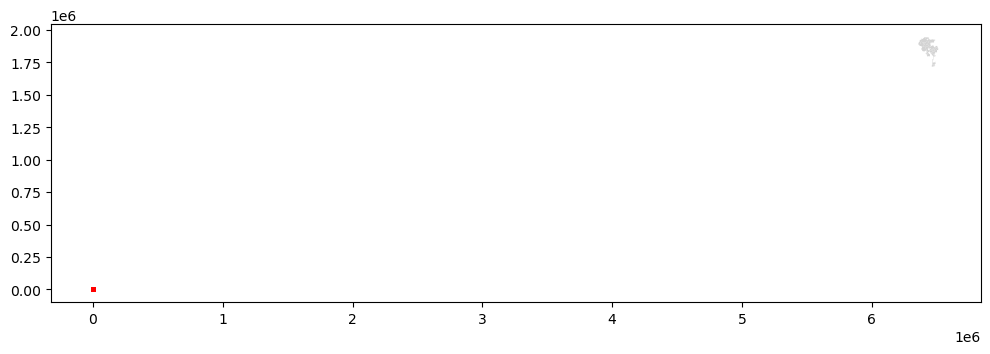

In [22]:
# Visualización rápida utilizando Geopandas y Matplotlib
fig, ax = plt.subplots(figsize=(12, 8))

# Dibujar polígonos de los distritos
polygons_gdf.plot(ax=ax, color='lightgrey')

# Dibujar puntos de los crímenes
crimes_gdf.plot(ax=ax, color='red', markersize=5)

plt.show()